In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

file_path = "./Mall_Customers.csv"

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(file_path)

# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

# # Fill NaN values with the mean of each column
# df.fillna(df.mean(), inplace=True)

print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [77]:
# Separate features (Age, Annual Income, Spending Score)
features = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Initialize scalers
standard_scaler = StandardScaler()

# Standardize features
standardized_features = standard_scaler.fit_transform(features)
# df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]] = standardized_features


# print(standardized_features)

In [79]:

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(standardized_features )

# # Add cluster labels to the original dataset
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

# Getting the labels assigned to each data point
labels = kmeans.labels_
print("\nLabels:")
print(labels)


Centroids:
[[-0.43033758  1.02223317  1.15593564]
 [ 0.82935381 -0.00348296 -0.65438593]
 [-0.98371627 -0.65995549  0.24488394]]

Labels:
[2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 1 1 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 1 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
 2 1 2 2 2 1 1 1 1 2 1 0 0 2 0 1 0 1 0 1 0 2 0 2 0 1 0 2 0 1 0 2 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


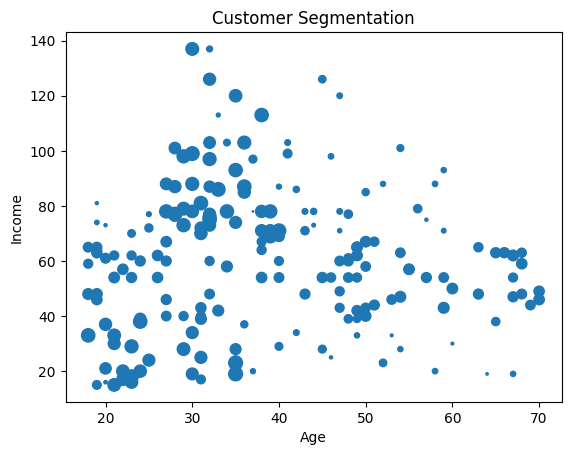

In [80]:
plt.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation')
plt.show()

**Problem: 2 - Optimal number of clusters**

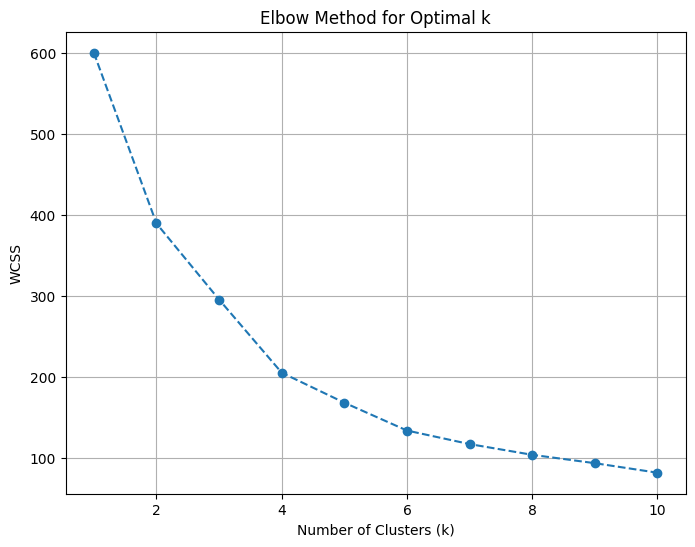

In [104]:
# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(standardized_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [106]:
# Chosen k=6

kmeans = KMeans(n_clusters=6, random_state=0, n_init=10).fit(standardized_features )
df['Cluster'] = kmeans_final.fit_predict(standardized_features)

centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

labels = kmeans.labels_
print("\nLabels:")
print(labels)

Centroids:
[[-0.85043527 -0.14894113 -0.04147777]
 [ 1.25472096 -0.24021294 -0.04399777]
 [-0.44191719  0.99158305  1.23950275]
 [ 0.17329545  1.06645385 -1.2980103 ]
 [ 0.47895722 -1.30822992 -1.19644353]
 [-0.99396865 -1.34734766  1.06404834]]

Labels:
[5 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 1 5 4 0 4 5 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 2 0 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
